# NEXTMap One - Elevation Data (Streaming) and Viewshed
In this exmaple we show how to use NEXTMap One digital elevation model following by a pocessing call (viewshed). Since NEXTMap One digital elevation model is a Streaming block which does not allow downloading or storing the original images, only the analytics results
This is the next generation global 3D terrain dataset by Intermap. It provides seamless data at one-meter resolution enabling precise spatial analysis. NEXTMap One is a comprehensive worldwide offering that is available as a digital surface model (DSM) and digital terrain model (DTM).

Viewshed block determines everywhere visible from a specific location. The algorithm's input is a DEM, an observer location, height above the ground for the observation, and a range of azimuth angles defining the observation direction. Based on a calculated maximum target distance and target height the algorithm determines whether every potential target within the maximum distance will be visible. Output of this block is the geographical area that is visible from a location. It includes all surrounding points that are in line-of-sight with that location and excludes points that are beyond the horizon or obstructed by terrain and other features (e.g., buildings, trees).

In the example, the workflow, the area of interest and the workflow parameters are defined. After running the job, the results are downloaded and visualized. For more information, refer to the block's [UP42 Marketplace page](https://marketplace.up42.com/block/1f09fcb0-7f5c-4e91-b059-36df7f64d2c9) and [Documentation](https://docs.up42.com/up42-blocks/data/nextmap-1m.html).

In [1]:
import up42

In [2]:
up42.authenticate(project_id="1234", 
                  project_api_key="abcd")
project = up42.initialize_project()

2021-03-11 13:33:28,729 - Authentication with UP42 successful!
2021-03-11 13:33:29,389 - Initialized Project(name: nextmap, project_id: 74faca4e-bbf5-480b-ac67-6edf10b31643, description: , createdAt: 2020-07-28T14:46:43.620Z)


In [3]:
# Construct workflow
workflow = project.create_workflow(name="NEXTMap-One-example", use_existing=True)
input_tasks = ["nextmapone-1m", "viewshed"]
workflow.add_workflow_tasks(input_tasks)

2021-03-11 13:33:30,210 - Getting existing workflows in project ...
2021-03-11 13:33:30,540 - Got 3 workflows for project 74faca4e-bbf5-480b-ac67-6edf10b31643.
100%|██████████| 3/3 [00:01<00:00,  2.93it/s]
2021-03-11 13:33:31,582 - Using existing workflow: NEXTMap-One-example - 3d334cb9-be35-4663-a96e-c58f2a31da7e
2021-03-11 13:33:35,230 - Added tasks to workflow: [{'name': 'nextmapone-1m:1', 'parentName': None, 'blockId': '1f09fcb0-7f5c-4e91-b059-36df7f64d2c9'}, {'name': 'viewshed:1', 'parentName': 'nextmapone-1m:1', 'blockId': '52060864-1346-40ba-b340-f47083bb2d8a'}]


In [4]:
nextmap_example_aoi = {"type": "FeatureCollection","features": [{"type": "Feature","properties": {},
      "geometry": {"type": "Polygon","coordinates": [[[-105.29594,40.049061],
                                                      [-105.283048,40.049061],
                                                      [-105.283048,40.061953],
                                                      [-105.29594,40.061953],
                                                      [-105.29594,40.049061]]]}}]}

In [5]:
input_parameters = workflow.construct_parameters(geometry=nextmap_example_aoi, geometry_operation="bbox")
input_parameters["viewshed:1"].update({
    "observer_latitude": 40.0556926967,
    "observer_longitude": -105.2884229696,
    "observer_height_meters": 3,
    "target_height_meters": 2,
    "start_azimuth_degrees": 0})

In [6]:
# Price estimation
workflow.estimate_job(input_parameters)

2021-03-11 13:33:46,484 - Estimated: 2664-2664 Credits, Duration: 0-0 min.


{'nextmapone-1m:1': {'blockConsumption': {'resources': {'unit': 'SQUARE_KM',
    'min': 1.576462,
    'max': 1.576462},
   'credit': {'min': 2562, 'max': 2562}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}},
 'viewshed:1': {'blockConsumption': {'resources': {'unit': 'SCENE',
    'min': 1,
    'max': 1},
   'credit': {'min': 100, 'max': 100}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}}}

In [7]:
# Run a test job to query data availability and check the configuration.
test_job = workflow.test_job(input_parameters, track_status=True)

2021-03-11 13:34:39,526 - +++++++++++++++++++++++++++++++++
2021-03-11 13:34:39,527 - Running this job as Test Query...
2021-03-11 13:34:39,528 - +++++++++++++++++++++++++++++++++
2021-03-11 13:34:39,529 - Selected input_parameters: {'nextmapone-1m:1': {'clip_to_aoi': True, 'bbox': [-105.29594, 40.049061, -105.283048, 40.061953]}, 'viewshed:1': {'end_azimuth_degrees': 360.0, 'max_distance_meters': 200.0, 'target_height_meters': 2, 'start_azimuth_degrees': 0, 'observer_height_meters': 3, 'observer_latitude': 40.0556926967, 'observer_longitude': -105.2884229696}, 'config': {'mode': 'DRY_RUN'}}
2021-03-11 13:34:40,757 - Created and running new job: 2ad90de7-3f97-4744-b282-72761d0dbc02.
2021-03-11 13:34:41,084 - Tracking job status continuously, reporting every 30 seconds...
2021-03-11 13:35:02,829 - Job finished successfully! - 2ad90de7-3f97-4744-b282-72761d0dbc02


In [8]:
# Run the actual job.
job = workflow.run_job(input_parameters, track_status=True)

2021-03-11 13:35:10,143 - Selected input_parameters: {'nextmapone-1m:1': {'clip_to_aoi': True, 'bbox': [-105.29594, 40.049061, -105.283048, 40.061953]}, 'viewshed:1': {'end_azimuth_degrees': 360.0, 'max_distance_meters': 200.0, 'target_height_meters': 2, 'start_azimuth_degrees': 0, 'observer_height_meters': 3, 'observer_latitude': 40.0556926967, 'observer_longitude': -105.2884229696}}
2021-03-11 13:35:15,371 - Created and running new job: e0492bbf-c852-40f6-91ae-41abf3eef8cc.
2021-03-11 13:35:15,704 - Tracking job status continuously, reporting every 30 seconds...
2021-03-11 13:35:48,168 - Job is RUNNING! - e0492bbf-c852-40f6-91ae-41abf3eef8cc
2021-03-11 13:36:20,349 - Job is RUNNING! - e0492bbf-c852-40f6-91ae-41abf3eef8cc
2021-03-11 13:36:52,371 - Job is RUNNING! - e0492bbf-c852-40f6-91ae-41abf3eef8cc
2021-03-11 13:37:24,503 - Job is RUNNING! - e0492bbf-c852-40f6-91ae-41abf3eef8cc
2021-03-11 13:37:56,514 - Job is RUNNING! - e0492bbf-c852-40f6-91ae-41abf3eef8cc
2021-03-11 13:38:28,525 

In [ ]:
job.download_results()

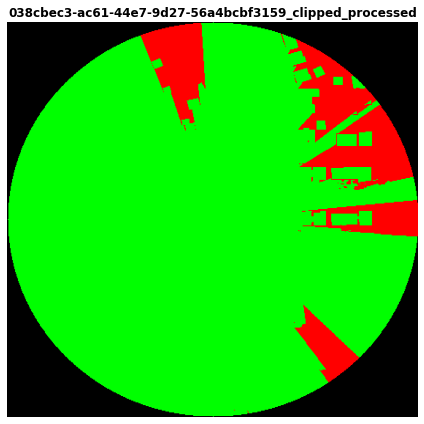

In [10]:
job.plot_results(figsize=(6,6))